In [3]:
!pip install librosa

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile as wav
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [7]:
def plot_sound(path):
    plt.figure(figsize=(14, 5))
    x, sr = librosa.load(path)
    print("length {}, sample-rate {}".format(x.shape, sr))
    librosa.display.waveshow(x)

    return x

length (47040,), sample-rate 22050


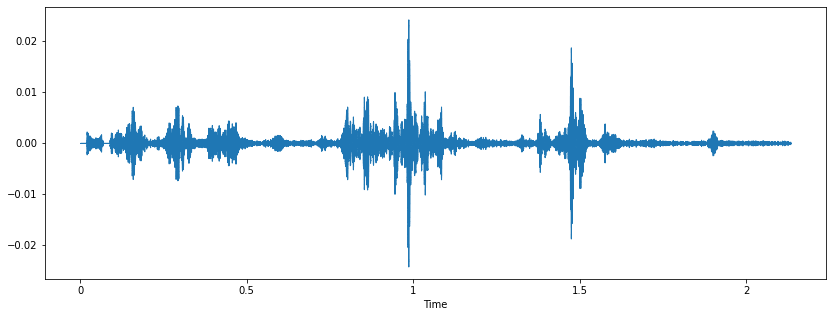

In [8]:
rock_path = '/home/linxu/Desktop/Covid-19/新冠肺炎声音诊断挑战赛2.0公开数据/测试集/a0.wav'
rock_audio = plot_sound(rock_path)
ipd.Audio(rock_path)

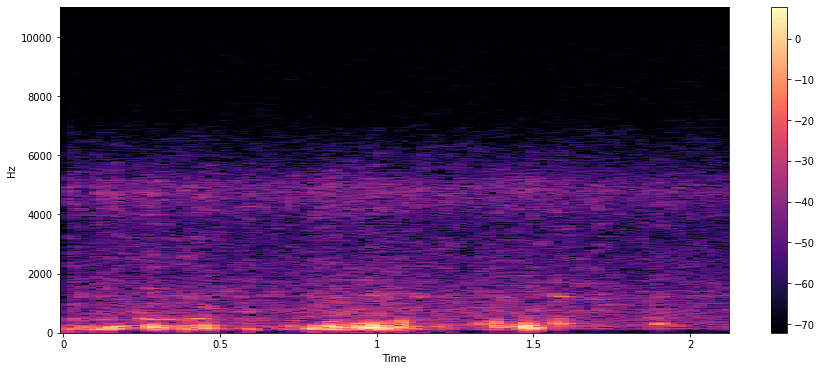

In [12]:
x, sr = librosa.load(rock_path)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [20]:
amered = '/home/linxu/Desktop/Covid-19/新冠肺炎声音诊断挑战赛2.0公开数据/训练集/cough/negative/163_male_cough.wav'
cangoo = '/home/linxu/Desktop/Covid-19/新冠肺炎声音诊断挑战赛2.0公开数据/训练集/cough/positive/138_male_cough.wav'

In [21]:
# Importing the 5 files
y_amered, sr_amered = librosa.load(amered)
audio_amered, _ = librosa.effects.trim(y_amered)

y_cangoo, sr_cangoo = librosa.load(cangoo)
audio_cangoo, _ = librosa.effects.trim(y_cangoo)

In [22]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_amered = np.abs(librosa.stft(audio_amered, n_fft = n_fft, hop_length = hop_length))
D_cangoo = np.abs(librosa.stft(audio_cangoo, n_fft = n_fft, hop_length = hop_length))

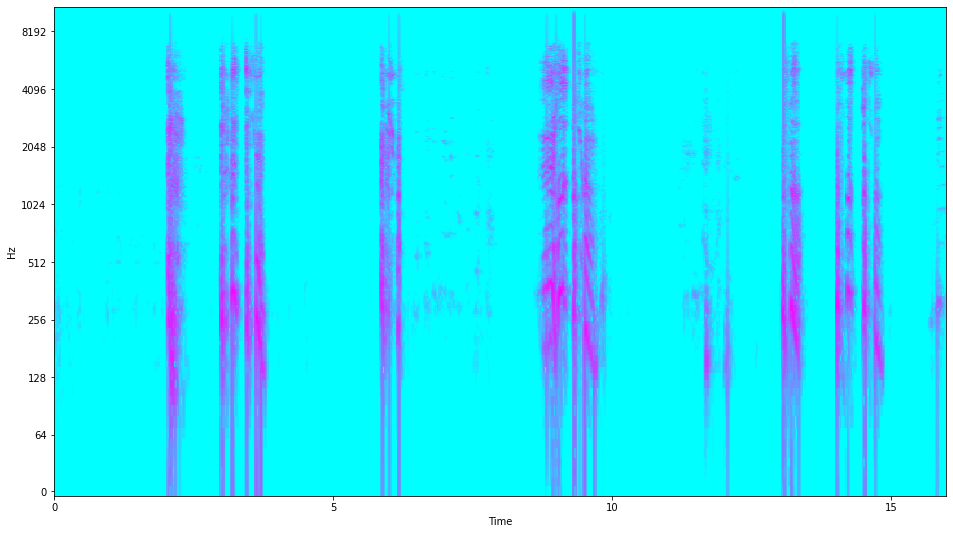

In [27]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_amered = librosa.amplitude_to_db(D_amered, ref = np.max)
DB_cangoo = librosa.amplitude_to_db(D_cangoo, ref = np.max)


# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
# fig.suptitle('Spectrogram', fontsize=16)
# fig.delaxes(ax[1, 2])

librosa.display.specshow(DB_amered, sr = sr_amered, hop_length = hop_length, x_axis = 'time',
                         y_axis = 'log', cmap = 'cool')


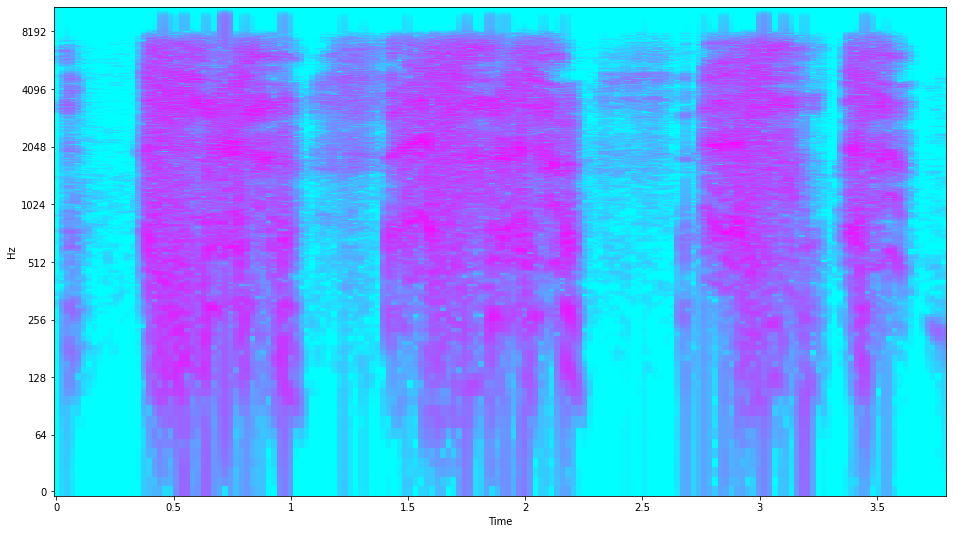

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
librosa.display.specshow(DB_cangoo, sr = sr_cangoo, hop_length = hop_length, x_axis = 'time',
                         y_axis = 'log', cmap = 'cool')